# Logistic Regression
Import the libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [146]:
df=pd.read_csv('loan_prediction.csv')

In [147]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [148]:
df.shape

(614, 13)

In [149]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [151]:
df=df.dropna()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


### Descriptive Statistices

In [153]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


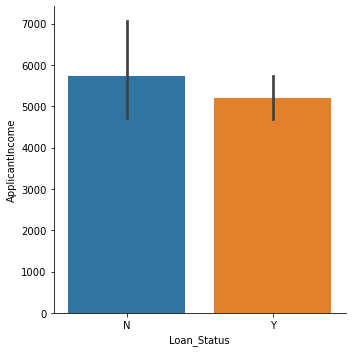

In [154]:
sns.catplot(x='Loan_Status',y='ApplicantIncome',kind='bar',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

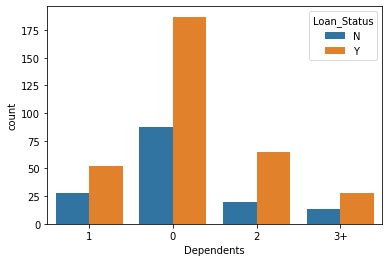

In [155]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

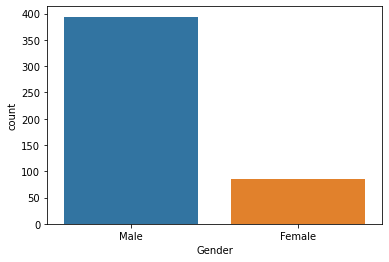

In [156]:
sns.countplot(x='Gender',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

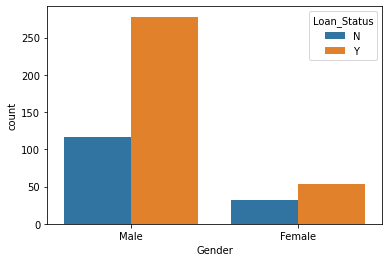

In [157]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

gender=pd.get_dummies(df['Gender'],drop_first=True)
marriege=pd.get_dummies(df['Married'],drop_first=True)
education=pd.get_dummies(df['Education'],drop_first=True)
selfemp=pd.get_dummies(df['Self_Employed'],drop_first=True)

df.drop(['Gender','Married','Education','Self_Employed'],axis=1,inplace=True)

print(gender, marriege, education, selfemp)

In [158]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [159]:
df['Dependents']=df['Dependents'].replace({'3+':int(3)})
df['Dependents']=df['Dependents'].replace({'1':int(1)})
df['Dependents']=df['Dependents'].replace({'2':int(2)})
df['Dependents']=df['Dependents'].replace({'0':int(0)})

In [160]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [161]:
df.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [162]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [163]:
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [164]:
df.reset_index(inplace=True)

In [165]:
df

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
476,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
477,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
478,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [166]:
df.drop('index',axis=1,inplace=True)

In [167]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [168]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [197]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [198]:
y_predicted=model.predict(x_test)

In [199]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.8541666666666666

In [200]:
y_predicted

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1])

### Predict the loan approval for particular customer 
Notes:

1. For Male please enter 1 and for Female please enter 0

2. For Married customer please enter 1 and for single customer please enter 0

3. If the customer is Not Graduate please enter 1 and if the customer is Graduate please enter 0

4. If the customer is Self employed please enter 1, otherwise please enter 0

5. For property in rural area please enter 0,For property in semiurban please enter 1, and for property in urban area please enter 2

6. Please enter the amount value in us dollar

In [201]:
values=[0]*x.shape[1]
np.array(values)
data=np.array(x.columns)
values

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [202]:
for i in range(0, x.shape[1]):
    values[i]=int(input(print(f'Enter the value for',data[i] )))
values=np.reshape(values,[1,11])
customer= pd.DataFrame(values, index=range(1), columns=x.columns)
loan_Status=model.predict(customer)
if loan_Status[0]==1:
    print('\n\n Congratulations: The Loan is approved for you')
else:
    print('\n\n Sorry: The Loan is not approved for you')

Enter the value for Gender
None0
Enter the value for Married
None0
Enter the value for Dependents
None0
Enter the value for Education
None0
Enter the value for Self_Employed
None1
Enter the value for ApplicantIncome
None4583
Enter the value for CoapplicantIncome
None0
Enter the value for LoanAmount
None133
Enter the value for Loan_Amount_Term
None360
Enter the value for Credit_History
None0
Enter the value for Property_Area
None1


 Sorry: The Loan is not approved for you
